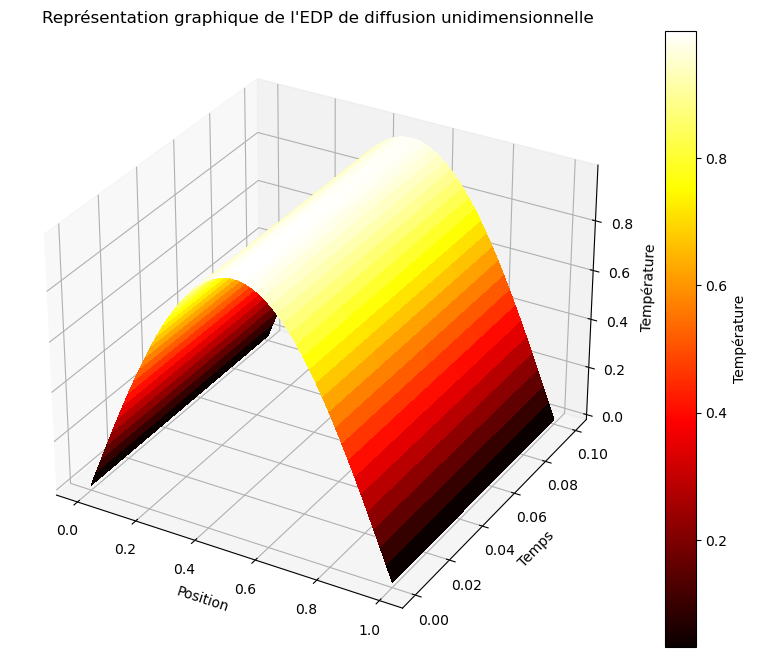

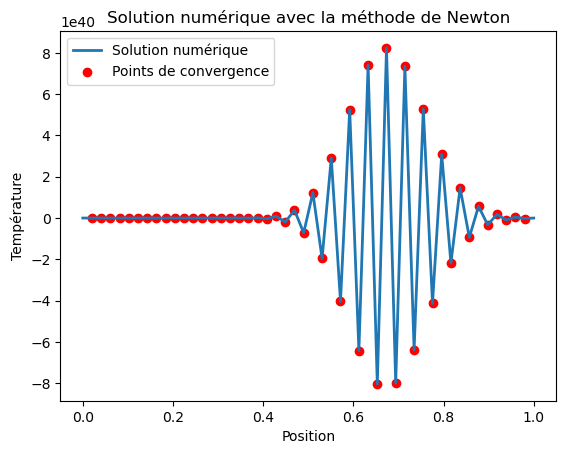

Valeurs de la solution numérique :
 [ 0.00000000e+00  1.89631002e+25  9.47568541e+25 -4.88234883e+26
 -3.70415270e+27  2.05021040e+28  8.45639451e+28 -7.89207151e+29
 -2.52672146e+29  2.22590517e+31 -7.81506272e+31 -2.32646672e+32
  3.13976655e+33 -1.16639689e+34 -5.45321633e+33  3.22276010e+35
 -2.27165570e+36  1.07054841e+37 -4.00304857e+37  1.26511393e+38
 -3.49114422e+38  8.58127966e+38 -1.90431554e+39  3.85276600e+39
 -7.15942540e+39  1.22911324e+40 -1.95866818e+40  2.90850727e+40
 -4.03764529e+40  5.25443480e+40 -6.42510333e+40  7.39713621e+40
 -8.03211535e+40  8.23817242e+40 -7.99154277e+40  7.34034994e+40
 -6.39011886e+40  5.27674069e+40 -4.13609238e+40  3.07917291e+40
 -2.17821626e+40  1.46470157e+40 -9.36467863e+39  5.69382058e+39
 -3.29238847e+39  1.81051157e+39 -9.46720533e+38  4.70412542e+38
 -2.26749600e+38  1.22464680e-16]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
'''
pour utiliser la classe Axes3D dans matplotlib lors de la création de graphiques tridimensionnels.
'''
# Paramètres
L = 1.0          # Longueur spatiale
Nx = 50          # Nombre de points spatiaux
alpha = 0.01     # Coefficient de diffusion thermique
T = 0.1          # Temps total
Nt = 100         # Nombre de points temporels
dx = L / (Nx - 1) #le pas spatial
dt = T / (Nt - 1) #le pas temporel

# Conditions initiales
x_vals = np.linspace(0, L, Nx)
'''
créer un tableau de valeurs espacées linéairement dans l'intervalle [0,L] avec un nombre total des point Nx
'''
t_vals = np.linspace(0, T, Nt)
X_values, T_values = np.meshgrid(x_vals, t_vals)
'''
grille bidimensionnelle utilisée pour représenter toutes les combinaisons possibles de positions et de temps
'''

# Initialisation de la solution
u0 = np.sin(np.pi *X_values) * np.exp(-alpha * np.pi**2 * T_values)

# Représentation graphique en 3D de l'équation aux dérivées partielles
fig = plt.figure(figsize=(10, 8)) #(largeur,hauteur)
ax = fig.add_subplot(111, projection='3d') 
'''
pour ajouter des axes a la figure , 111 parametre signifiant une grille avec une colone et une ligne
'''

# Affichage de la surface tridimensionnelle
surface = ax.plot_surface(X_values, T_values, u0, cmap='hot', rstride=1, cstride=1, antialiased=False)
'''
 rstride=1, cstride=1:Ces paramètres déterminent le nombre de lignes et de colonnes
 antialiased=False: permet d'éviter le crénelage
'''
# Ajout d'étiquettes et d'un titre
ax.set_xlabel('Position')
ax.set_ylabel('Temps')
ax.set_zlabel('Température')
ax.set_title('Représentation graphique de l\'EDP de diffusion unidimensionnelle')

# Ajout d'une barre de couleur
fig.colorbar(surface, ax=ax, label='Température')
plt.show()

# Initialisation de la solution
u = np.sin(np.pi * x_vals) * np.exp(-alpha * np.pi**2 * t_vals[0])

# Résolution numérique de l'équation de la diffusion avec la méthode de Newton
def equation_diffusion(u, alpha, dx, dt):
    return u[1:-1] - alpha * np.diff(np.diff(u)) / dx**2 - (u[1:-1] - u[:-2]) / dt
'''
equation_diffusion: représente l'équation discrétisée de l'équation de la diffusion en une dimension.
u[1:-1] : cette partie sélectionne les éléments de u à l'intérieur du domaine spatial, excluant les bords.
alpha * np.diff(np.diff(u)) / dx**2 : cela représente la discrétisation de la seconde dérivée spatiale
                                     en utilisant une différence finie centrée. 
(u[1:-1] - u[:-2]) / dt : cela représente la dérivée temporelle de u en utilisant une différence finie vers l'arrière.

''' 

def jacobienne_diffusion(u, alpha, dx, dt):
    N = len(u)
    J = np.zeros((N-2, N-2))
    diagonal = 1 + 2 * alpha / dx**2 + 1 / dt
    off_diagonal = -alpha / dx**2

    np.fill_diagonal(J, diagonal)
    np.fill_diagonal(J[1:], off_diagonal)
    np.fill_diagonal(J[:, 1:], off_diagonal)

    return J
'''
N = len(u) : Détermine la longueur de la solution u
J = np.zeros((N-2, N-2)) : Initialise une matrice jacobienne J de taille (N-2) x (N-2)
N-2 :car la matrice jacobienne est calculée pour les points intérieurs du domaine spatial, en excluant les bords.
diagonal = 1 + 2 * alpha / dx**2 + 1 / dt : Calcule la valeur de la diagonale principale de la matrice jacobienne.
(lié à la diffusion spatiale et temporelle.)
off_diagonal = -alpha / dx**2 : Calcule la valeur des termes hors-diagonaux de la matrice jacobienne.
(lié à la diffusion spatiale.)
np.fill_diagonal(J, diagonal) : Remplit la diagonale principale de la matrice jacobienne J avec la valeur calculée précédemment (diagonal).
np.fill_diagonal(J[1:], off_diagonal):Remplissage de  la partie inférieure de la matrice.
np.fill_diagonal(J[:, 1:], off_diagonal) : Remplissage de la partie supérieure de la matrice.
'''

def newton_solution(u, alpha, dx, dt, tolerance=1e-6, max_iterations=100):
    for iteration in range(max_iterations):
        residu = equation_diffusion(u, alpha, dx, dt)
        jacobian_matrice = jacobienne_diffusion(u, alpha, dx, dt)
        inverse_jacobian = np.linalg.pinv(jacobian_matrice)
        update = inverse_jacobian.dot(residu)

        u[1:-1] -= update

        if np.linalg.norm(update) < tolerance:
            print(f"Convergence atteinte à l'itération {iteration + 1}")
            break

    return u

# Résolution avec la méthode de Newton
u_solution = newton_solution(u, alpha, dx, dt)

# Affichage de la solution numérique
plt.plot(x_vals, u_solution, label='Solution numérique', linewidth=2)
plt.scatter(x_vals[1:-1], u_solution[1:-1], c='red', label='Points de convergence')
plt.title('Solution numérique avec la méthode de Newton')
plt.xlabel('Position')
plt.ylabel('Température')
plt.legend()
plt.show()
#Afficher la solution numerique
print("Valeurs de la solution numérique :\n", u_solution)